**SOFT DEADLINE:** `14.11.2021 11:59 msk` 

# Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [1]:
# Importing required libraries
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import OrderedDict

#### Load data

In [2]:
data = pd.read_csv("web_sites_data.csv")

In [3]:
data.head()

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


In [4]:
text = data.values
text

array([['<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.png">\n<title>Eric Newby : Love and War in the Apennines</title>\n<meta http-equiv="Content-Type" content="text/html">\n\t\n</head>\n<body bgcolor="#FFFFFF" leftmargin="0" topmargin="0" marginwidth="0" marginheight="0" text="#000000" link="#0000FF" vlink="#0000FF" alink="#FF0000" >\n<basefont face="arial, sans-serif"><font face="arial, sans-serif">\n<table width="100%" height="70" border="0" cellpadding="0" cellspacing="0">\n\t<tr><form action="/search" method="get">\n\t\t<td width="283" colspan="2" rowspan="2" bgcolor="#689A9B">\n\t\t\t<a href="/">\n\t\t\t\t<img src="http://i.bookmooch.com/images/bookmooch_logo.gif" width="283" height="66" border="0" alt="BookMooch logo"></a></td>\n\t\t<td width="675" height="38" colspan="9" align="right" bgcolor="#689A9B" xcolor="#689A9B">\n\t

In [5]:
len(text)

71699

#### Data processing

In [6]:
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/pk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/pk/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
#  Word net Lemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
# Stop words
stop_words = set(stopwords.words("english"))
print(stop_words)

{'own', 'why', 'by', 'on', 'too', 'which', 'nor', 'y', 'no', 'those', 'each', 'll', 'all', 'doesn', 'can', 'what', 'of', 'yours', 'been', 'when', 'then', "hasn't", "mustn't", 'after', 'for', 'he', 'have', 'below', 'up', 'both', 'in', 'any', 'as', 'only', 'so', "you've", 'himself', 'will', 'ma', "you're", 'its', 'an', 'between', 'off', 'over', 'm', 'my', 'didn', "that'll", 'i', 'is', 'how', "doesn't", "hadn't", 'about', 'again', 'yourself', "shan't", 'their', 'ain', 'needn', 'few', 'shan', 'his', 'to', 'you', 'there', "should've", 'd', 'aren', "won't", 'while', 'where', 'myself', 'were', 'has', "needn't", 'into', "she's", 'hasn', 'weren', 'if', 'herself', 'mightn', 'same', 'once', "don't", 'wouldn', 'through', 'such', 'but', 'more', 'down', 're', 'than', 'it', "didn't", 'being', "you'd", 'am', 'won', 'isn', 'whom', 'from', 'above', 'very', "isn't", 'mustn', 'was', 'most', 'shouldn', "wouldn't", 's', 'hadn', 'them', 'should', 'did', 'the', "it's", 'further', 'they', 'until', 'she', 'ours

In [9]:
def clean_text(text):
    '''
    Function to clean the text data of the crawled web-pages 
    '''
    # Extracting text from html text
    text = ' '.join(BeautifulSoup(text, "html.parser").stripped_strings)
    # Removing all the symbols and numbers
    whitelist = string.ascii_letters + ' '
    text = ''.join(c for c in text if c in whitelist)
    # Removing all the non english words
    words = set(nltk.corpus.words.words())
    text = ' '.join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
    
    text = re.sub(" x", " ", text)
    # Removing extra spaces
    text = re.sub(" +", " ", text)
    # Make the alphsbets lower
    text = text.lower()
    # Lemmatizating the words
    text = [lemmatizer.lemmatize(token) for token in word_tokenize(text)]
    # Removing the stop words.
    text = [word for word in text if not word in stop_words]
    # removing the all single letter words
    text = [i for i in text if len(i)>1]
    # join the text into the string
    text = " ".join(text)
    return text

## Only first 1000 rows of data is seleceted due to complexity issue.

In [10]:
# Collecting all the words into the list to build frequency distribution
total=[]
for i in range(1000):
    total += clean_text(text[i][0]).split()

In [11]:
total

['eric',
 'love',
 'war',
 'eric',
 'love',
 'war',
 'author',
 'eric',
 'title',
 'love',
 'war',
 'available',
 'short',
 'walk',
 'slowly',
 'mediterranean',
 'last',
 'grain',
 'race',
 'round',
 'low',
 'gear',
 'box',
 'show',
 'abridged',
 'ancient',
 'general',
 'eastern',
 'front',
 'edition',
 'format',
 'florence',
 'history',
 'history',
 'general',
 'history',
 'general',
 'home',
 'front',
 'intelligence',
 'medieval',
 'military',
 'naval',
 'pearl',
 'harbor',
 'personal',
 'reference',
 'renaissance',
 'travel',
 'travel',
 'general',
 'western',
 'front',
 'world',
 'war',
 'writing',
 'binding',
 'audio',
 'date',
 'publisher',
 'audio',
 'weight',
 'size',
 'edition',
 'abridged',
 'oh',
 'ca',
 'deb',
 'description',
 'book',
 'description',
 'made',
 'peace',
 'summer',
 'allied',
 'eric',
 'among',
 'away',
 'prison',
 'wa',
 'behind',
 'went',
 'help',
 'retreating',
 'enemy',
 'sheltered',
 'three',
 'classic',
 'memoir',
 'selfless',
 'people',
 'unchanging',


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [12]:
# functions to find meaningful words.
meaningfull_tag=lambda x: len(re.findall(r"NN.*", x)) + len(re.findall(r"V.*", x )) + len(re.findall(r"JJ.*", x )) + len(re.findall(r"RB.*", x ))!=0
meaningfull_words = [a[0] for a in nltk.pos_tag(total) if meaningfull_tag(a[1]) ]

In [13]:
len(meaningfull_words)

373783

In [14]:
len(total)

385788

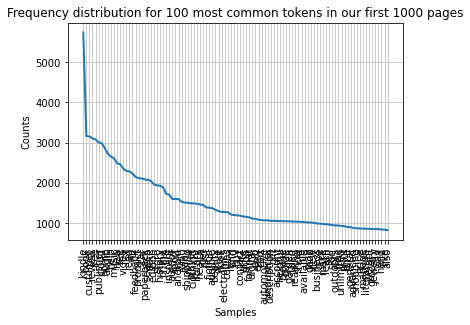

<AxesSubplot:title={'center':'Frequency distribution for 100 most common tokens in our first 1000 pages'}, xlabel='Samples', ylabel='Counts'>

In [15]:
fdist = nltk.FreqDist(meaningfull_words)
fdist.plot(100,title='Frequency distribution for 100 most common tokens in our first 1000 pages')

In [16]:
fdist

FreqDist({'kindle': 5738, 'book': 3161, 'customer': 3153, 'review': 3104, 'free': 3077, 'publisher': 3004, 'cloud': 2983, 'home': 2862, 'audio': 2718, 'help': 2652, ...})

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [17]:
clean_text(text[168][0])
# text[168][0]

'collins complete book soft collins complete book soft author title collins complete book soft available home garden home repair home interior design binding paperback date publisher weight size edition rev sub used description product description everything inspiration create beautiful soft home designer jane suit every taste style along expert advice choosing color pattern fabric directory extensive section sewing inspiring designer showcase period modern interior main part book stunning collection specially selected ease making complete book soft professional virtually every home decorator previous book jane recommend'

In [18]:
clean_text(text[8][0])

'apocalypse watch apocalypse watch author title apocalypse watch available road weekend reading comic drama erotica foreign language fiction genre fiction history criticism correspondence literary literature fiction mystery thriller suspense poetry short spy tale intrigue fiction world literature binding audio date publisher recommend'

As the text is scraped from html pages. Most of the text is being repeated, which reduces the model quality. The data should be more preprocessed

# Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [19]:
content=[]
for i in range(1000):
    content.append((clean_text(text[i][0])))

In [20]:
content

['eric love war eric love war author eric title love war available short walk slowly mediterranean last grain race round low gear box show abridged ancient general eastern front edition format florence history history general history general home front intelligence medieval military naval pearl harbor personal reference renaissance travel travel general western front world war writing binding audio date publisher audio weight size edition abridged oh ca deb description book description made peace summer allied eric among away prison wa behind went help retreating enemy sheltered three classic memoir selfless people unchanging funny bizarre dangerous local girl later wife exciting story superbly told punch related interest hood freedom available bot recommend',
 'eric short walk eric short walk author eric title short walk available world dozen bookseller lovely three tea one mission elegance hedgehog banner heaven story pat parker feminism smith giraffe longitude true story lone five q

In [21]:
from datasketch import MinHash, LeanMinHash, MinHashLSH
from nltk.util import ngrams

# threshold of 0.75 is considered for duplicates.
lsh = MinHashLSH(threshold=0.75, num_perm=128)

# Create MinHash objects
minhashes = {}
for c, i in enumerate(content):
    minhash = MinHash(num_perm=128)
    for d in ngrams(i, 4):
        minhash.update("".join(d).encode('utf-8'))
    lsh.insert(c, minhash)
    minhashes[c] = minhash


In [22]:
count = 0
for i in range(len(minhashes.keys())):
    result = lsh.query(minhashes[i])
    count += len(result)-1
count/2

7851.0

#### Number of duplicate pairs are 7851 amoung the 1000 documents. (for shingle size of 4 and minhash length of 128)

In [23]:
shingle_size = range(2,7)
num_perm = 64
count_dup_shingle = {}


for size in shingle_size:
    lsh = MinHashLSH(threshold=0.75, num_perm=128)
    minhashes = {}
    for c, i in enumerate(content):
        minhash = MinHash(num_perm=128)
        for d in ngrams(i, size):
            minhash.update("".join(d).encode('utf-8'))
        lsh.insert(c, minhash)
        minhashes[c] = minhash
    count = 0
    for i in range(len(minhashes.keys())):
        result = lsh.query(minhashes[i])
        count += len(result)-1
        count_dup_shingle[size] = count/2
count_dup_shingle

{2: 112979.0, 3: 27321.0, 4: 7851.0, 5: 5037.0, 6: 6363.0}

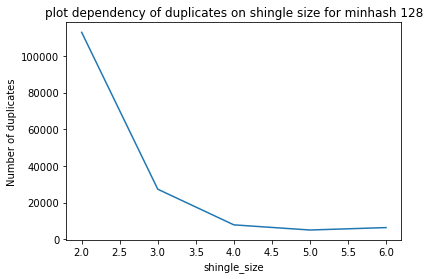

In [24]:
import matplotlib.pyplot as plt
plt.plot(count_dup_shingle.keys(), count_dup_shingle.values())
plt.xlabel("shingle_size")
plt.ylabel("Number of duplicates")
plt.title("plot dependency of duplicates on shingle size for minhash 128")
plt.show()


In [25]:
shingle_size = 4
num_perm = range(16, 130, 16)
count_dup_hash = {}


for size in num_perm:
    lsh = MinHashLSH(threshold=0.75, num_perm= size)
    minhashes = {}
    for c, i in enumerate(content):
        minhash = MinHash(size)
        for d in ngrams(i, shingle_size):
            minhash.update("".join(d).encode('utf-8'))
        lsh.insert(c, minhash)
        minhashes[c] = minhash
    count = 0
    for i in range(len(minhashes.keys())):
        result = lsh.query(minhashes[i])
        count += len(result)-1
        count_dup_hash[size] = count/2
count_dup_hash

{16: 7179.0,
 32: 3127.0,
 48: 3928.0,
 64: 3563.0,
 80: 4041.0,
 96: 6397.0,
 112: 9669.0,
 128: 7851.0}

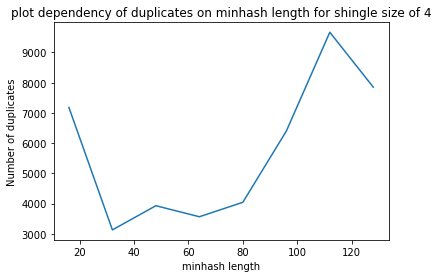

In [26]:
plt.plot(count_dup_hash.keys(), count_dup_hash.values())
plt.xlabel("minhash length")
plt.ylabel("Number of duplicates")
plt.title("plot dependency of duplicates on minhash length for shingle size of 4")
plt.show()

# [Optional 15 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. In the second part you will classify the observations into several classes using vectors obtained with trained topic models.

In [27]:
data2 = pd.read_csv("data.csv")
data2.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

## Only first 1000 rows of data is seleceted due to complexity issue.

In [28]:
data2 = data2[:1000]

In [29]:
text2 = data2.values

In [30]:
text2

array([['id26305',
        'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.',
        'EAP'],
       ['id17569',
        'It never once occurred to me that the fumbling might be a mere mistake.',
        'HPL'],
       ['id11008',
        'In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.',
        'EAP'],
       ...,
       ['id12007',
        'But hoax, with these sort of people, is, I believe, a general term for all matters above their comprehension.',
        'EAP'],
       ['id08130',
        'She alone knew the weight which Raymond attached to his success.',
        'MWS'],
       ['id21282',
        'The town was now a city, and one by one the cabins

In [31]:
len(text2)

1000

In [225]:
for text in text2[:10]:
    print(clean_text(text[1]))

process however dungeon might make circuit return point whence set without aware fact perfectly uniform wall
never fumbling might mere mistake
left hand wa gold snuff box hill cutting manner fantastic took snuff incessantly air possible self satisfaction
lovely spring terrace sixteen fertile spread beneath speckled happy former heart cheering fair
finding nothing else even gold superintendent abandoned perplexed look occasionally countenance thinking desk
youth solitude best spent gentle feminine fosterage refined groundwork character overcome intense distaste usual brutality board ship never necessary mariner equally noted kindliness heart respect obedience crew felt peculiarly fortunate able secure
astronomer perhaps point took refuge suggestion non luminosity analogy wa suddenly let fall
surcingle hung body
knew could say stereotomy without brought think thus since subject long ago singularly yet little notice vague noble met confirmation late nebular cosmogony felt could avoid cast

#### Preprocessing the data

In [32]:
text2_preprocessed = []
for text in text2:
    text2_preprocessed.append(clean_text(text[1]))

text2_preprocessed

['process however dungeon might make circuit return point whence set without aware fact perfectly uniform wall',
 'never fumbling might mere mistake',
 'left hand wa gold snuff box hill cutting manner fantastic took snuff incessantly air possible self satisfaction',
 'lovely spring terrace sixteen fertile spread beneath speckled happy former heart cheering fair',
 'finding nothing else even gold superintendent abandoned perplexed look occasionally countenance thinking desk',
 'youth solitude best spent gentle feminine fosterage refined groundwork character overcome intense distaste usual brutality board ship never necessary mariner equally noted kindliness heart respect obedience crew felt peculiarly fortunate able secure',
 'astronomer perhaps point took refuge suggestion non luminosity analogy wa suddenly let fall',
 'surcingle hung body',
 'knew could say stereotomy without brought think thus since subject long ago singularly yet little notice vague noble met confirmation late nebul

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### coherence score to caluclate the quality of the topic models.

In [33]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import Nmf, CoherenceModel
from gensim.test.utils import common_texts
from operator import itemgetter

In [34]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = [d.split() for d in text2_preprocessed]

# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)


#### Building the function to caluclate the coherance score

In [35]:
def coherence_score(model, texts, dictionary):
    cm = CoherenceModel(
        model=model,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return cm.get_coherence()

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [36]:
from sklearn.model_selection import train_test_split
data2['text_preprocessed'] = text2_preprocessed
data2_preprocessed = data2[['text_preprocessed', 'author']]
data2_preprocessed

,text_preprocessed,author
0,process however dungeon might make circuit ret...,EAP
1,never fumbling might mere mistake,HPL
2,left hand wa gold snuff box hill cutting manne...,EAP
3,lovely spring terrace sixteen fertile spread b...,MWS
4,finding nothing else even gold superintendent ...,HPL
...,...,...
995,much toil found,EAP
996,length removing carefully meerschaum right lef...,EAP
997,hoax sort people believe general term comprehe...,EAP
998,alone knew weight attached success,MWS


In [37]:
X = data2_preprocessed['text_preprocessed']
y= data2_preprocessed['author']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Plot the histogram of resulting tokens counts in the processed datasets.

In [38]:
data2_preprocessed['tokens_no'] = data2_preprocessed['text_preprocessed'].apply(lambda x: len(x.split()))
data2_preprocessed.head()

<ipython-input-38-655672727b1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_preprocessed['tokens_no'] = data2_preprocessed['text_preprocessed'].apply(lambda x: len(x.split()))


,text_preprocessed,author,tokens_no
0,process however dungeon might make circuit ret...,EAP,16
1,never fumbling might mere mistake,HPL,5
2,left hand wa gold snuff box hill cutting manne...,EAP,17
3,lovely spring terrace sixteen fertile spread b...,MWS,13
4,finding nothing else even gold superintendent ...,HPL,13


Plot the histogram of resulting tokens counts in the processed datasets.

In [39]:
train_tokens = X_train.apply(lambda x: len(x.split()))
test_tokens = X_test.apply(lambda x: len(x.split()))

/home/pk/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of tokens')

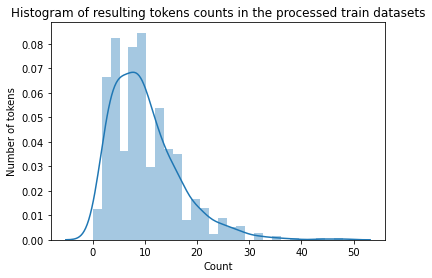

In [40]:
import seaborn as sns
sns.distplot(train_tokens, hist=True, kde=True)
plt.title('Histogram of resulting tokens counts in the processed train datasets')
plt.xlabel('Count')
plt.ylabel('Number of tokens')

/home/pk/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of tokens')

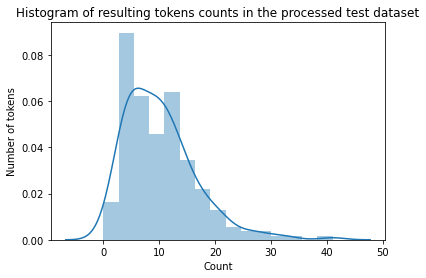

In [41]:
sns.distplot(test_tokens, hist=True, kde=True)
plt.title('Histogram of resulting tokens counts in the processed test dataset')
plt.xlabel('Count')
plt.ylabel('Number of tokens')

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import Nmf, CoherenceModel
from gensim.test.utils import common_texts
from operator import itemgetter
import gensim
from sklearn.decomposition import NMF, LatentDirichletAllocation



In [49]:

corpus = [dictionary.doc2bow(text) for text in texts]


Identifing the best number of topics for nsm model

In [50]:
coherence_scores_nsm = []
topic_nums = list(np.arange(10, 50 + 1, 10))

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    

    
    coherence_scores_nsm.append(coherence_score(nmf, texts, dictionary))

# Get the number of topics with the highest coherence score
scores_nsm = list(zip(topic_nums, coherence_scores_nsm))
best_num_topics_nsm = sorted(scores_nsm, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics_nsm)

50


In [51]:
scores_nsm

[(10, 0.40531375671374326),
 (20, 0.43338345933477973),
 (30, 0.4560628799283721),
 (40, 0.4452506574282724),
 (50, 0.465378413168113)]

In [52]:
nmf_best = Nmf(
        corpus=corpus,
        num_topics=best_num_topics_nsm,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )


In [46]:
# printing the resulting topics
for idx, topic in nmf_best.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.069*"three" + 0.040*"gold" + 0.039*"half" + 0.032*"discovery" + 0.028*"time" + 0.027*"broad" + 0.026*"long" + 0.024*"matter" + 0.023*"thinking" + 0.021*"certain"
Topic: 1 
Words: 0.106*"time" + 0.051*"much" + 0.039*"space" + 0.033*"little" + 0.027*"spoke" + 0.027*"work" + 0.023*"rise" + 0.021*"room" + 0.019*"distant" + 0.018*"black"
Topic: 2 
Words: 0.072*"could" + 0.064*"might" + 0.049*"love" + 0.037*"moment" + 0.031*"long" + 0.027*"peace" + 0.023*"another" + 0.023*"known" + 0.023*"well" + 0.022*"affection"
Topic: 3 
Words: 0.064*"heart" + 0.061*"felt" + 0.056*"sorrow" + 0.038*"could" + 0.031*"whose" + 0.030*"thus" + 0.030*"towards" + 0.029*"kind" + 0.028*"fell" + 0.027*"weep"
Topic: 4 
Words: 0.040*"old" + 0.040*"day" + 0.035*"full" + 0.030*"thing" + 0.028*"round" + 0.020*"often" + 0.020*"black" + 0.017*"fear" + 0.016*"wild" + 0.015*"length"
Topic: 5 
Words: 0.044*"wa" + 0.035*"sea" + 0.032*"pride" + 0.031*"unable" + 0.031*"since" + 0.024*"pain" + 0.022*"pleasure" 

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

Identifing the best number of topics for lda model

In [53]:
coherence_scores_lda = []
topic_nums = list(np.arange(10, 50 + 1, 10))

for num in topic_nums:
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    

    
    coherence_scores_lda.append(coherence_score(lda_model, texts, dictionary))

# Get the number of topics with the highest coherence score
scores_lda = list(zip(topic_nums, coherence_scores_lda))
best_num_topics_lda = sorted(scores_lda, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics_lda)

30


In [54]:
scores_lda

[(10, 0.44403360995935426),
 (20, 0.4947820453992223),
 (30, 0.5054090496079345),
 (40, 0.4812936371480303),
 (50, 0.466170072876575)]

In [55]:
lda_model_best = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=best_num_topics_lda, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [56]:
for idx, topic in lda_model_best.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.028*"well" + 0.022*"wa" + 0.020*"would" + 0.019*"might" + 0.019*"thou" + 0.017*"earth" + 0.016*"know" + 0.015*"saw" + 0.015*"feel" + 0.013*"greater"
Topic: 1 
Words: 0.033*"wa" + 0.029*"beyond" + 0.025*"even" + 0.025*"body" + 0.023*"take" + 0.023*"past" + 0.016*"serious" + 0.016*"remote" + 0.016*"upon" + 0.015*"might"
Topic: 2 
Words: 0.034*"wa" + 0.033*"spoke" + 0.032*"street" + 0.028*"one" + 0.024*"truth" + 0.020*"weight" + 0.019*"soon" + 0.017*"odd" + 0.017*"acute" + 0.016*"evidently"
Topic: 3 
Words: 0.036*"mouth" + 0.036*"wa" + 0.023*"self" + 0.022*"lady" + 0.018*"soul" + 0.018*"found" + 0.016*"might" + 0.014*"whole" + 0.014*"speak" + 0.014*"would"
Topic: 4 
Words: 0.033*"wa" + 0.030*"last" + 0.021*"half" + 0.021*"back" + 0.016*"world" + 0.015*"hold" + 0.015*"yet" + 0.014*"link" + 0.014*"capital" + 0.013*"permitted"
Topic: 5 
Words: 0.033*"wa" + 0.031*"find" + 0.018*"old" + 0.016*"may" + 0.015*"world" + 0.014*"continued" + 0.013*"sense" + 0.013*"fellow" + 0.013*

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

In [58]:
import artm
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
n_wd = cv.fit_transform(text2_preprocessed)
vocabulary = cv.get_feature_names()


/home/pk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
batch_vector = artm.BatchVectorizer(data_format='bow_n_wd',
                          n_wd=n_wd,
                          vocabulary=vocabulary)
dictionary_artm = artm.Dictionary()
dictionary_artm.gather(data_path=batch_vector.data_path)

In [60]:
num_tokens = 11
num_collection_passes = 15
num_document_passes = 1
num_topics = 20

model = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(num_topics)],
                          dictionary=dictionary_artm.name,
                          cache_theta=True)

model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=num_tokens))


In [61]:
model.num_document_passes = num_document_passes
model.fit_offline(batch_vectorizer=batch_vector, num_collection_passes=num_collection_passes)


Printing the resulting topics of ARTM model

In [62]:
for topic_name in model.topic_names:
    print (topic_name + ': ',)
    print (' '.join(model.score_tracker['TopTokensScore'].last_tokens[topic_name]))

topic_0: 
cabin repose increasing dead wind ultimate something suppose cried music dare
topic_1: 
across question closed fire abruptly alone number perhaps charnel promise pas
topic_2: 
eye departed cut mountain enough gradually brought plain ocean circumstance lake
topic_3: 
also beheld rapidly direction instant open onward great busy door poor
topic_4: 
appearance living difficulty behind pale sense must illness hell rash effect
topic_5: 
sitting plague safely glance misery rain retreat origin curiosity glad age
topic_6: 
mean condition assumed truth medical devoted least shaped round evident day
topic_7: 
vast follow thought reflected utter wonder stood devil certainly meant secure
topic_8: 
leaf length ho bright analysis language largely beautiful need queer delight
topic_9: 
distant definite toward second rat stage spot hill chief provided creation
topic_10: 
soon think air sudden vain desire discovery one ancient naked determined
topic_11: 
put little sympathy although violently 

/home/pk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Write a function to convert new documents to topics probabilities vectors.

In [63]:
def topic_vectors(doc):
    '''
    input:
    doc: List of documents in the form of strings
    returns: topic probability vectors
    '''
    doc_preprocessed = []
    for text in text2:
        doc_preprocessed.append(clean_text(text[1]))
        
    texts = [d.split() for d in doc_preprocessed]

    dictionary = Dictionary(texts)

    dictionary.filter_extremes(
        no_below=3,
        no_above=0.85,
        keep_n=5000
    )

    corpus = [dictionary.doc2bow(text) for text in texts]

    lda_model_best = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=best_num_topics_lda, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    return lda_model_best.get_topics()

In [65]:
# test data to check the function
test = content[:10]
test

['eric love war eric love war author eric title love war available short walk slowly mediterranean last grain race round low gear box show abridged ancient general eastern front edition format florence history history general history general home front intelligence medieval military naval pearl harbor personal reference renaissance travel travel general western front world war writing binding audio date publisher audio weight size edition abridged oh ca deb description book description made peace summer allied eric among away prison wa behind went help retreating enemy sheltered three classic memoir selfless people unchanging funny bizarre dangerous local girl later wife exciting story superbly told punch related interest hood freedom available bot recommend',
 'eric short walk eric short walk author eric title short walk available world dozen bookseller lovely three tea one mission elegance hedgehog banner heaven story pat parker feminism smith giraffe longitude true story lone five q

In [66]:
# topics probabilities vectors of the test data
topic_vectors(test)

array([[0.00011239, 0.00011239, 0.00396676, ..., 0.00011239, 0.00011239,
        0.00582234],
       [0.01474837, 0.00019198, 0.00019198, ..., 0.00019198, 0.00019198,
        0.00019198],
       [0.00012464, 0.00025481, 0.00012464, ..., 0.00012464, 0.00012464,
        0.00012464],
       ...,
       [0.00785906, 0.00013623, 0.00013623, ..., 0.00013623, 0.00013623,
        0.00013623],
       [0.00025229, 0.00025229, 0.00025229, ..., 0.00025229, 0.00025229,
        0.00025229],
       [0.00012103, 0.00609543, 0.00012103, ..., 0.00012103, 0.00012103,
        0.00012103]], dtype=float32)

Calculate the quality scores for each model. Make a barplot to compare the quality.

In [67]:
# Coherence Score for nsm model
scores_nsm = dict(scores_nsm)

In [68]:
# Coherence Score for lda model
scores_lda = dict(scores_lda)

In [69]:
df_scores = pd.DataFrame(index = list(scores_nsm.keys()))
df_scores['scores_nsm'] = list(scores_nsm.values())
df_scores['scores_lda'] = list(scores_lda.values())
df_scores
    

,scores_nsm,scores_lda
10,0.405314,0.444034
20,0.433383,0.494782
30,0.456063,0.505409
40,0.445251,0.481294
50,0.465378,0.466170


/home/pk/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'barplot to compare the quality.')

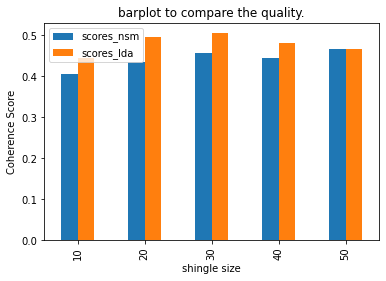

In [70]:
df_scores.plot.bar()
plt.xlabel("shingle size")
plt.ylabel("Coherence Score")
plt.title("barplot to compare the quality.")

## From the plot it is clear that LDA model has better quality score.